In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv",index_col="customerID")

In [14]:
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [7]:
df['TotalCharges']=df['TotalCharges'].replace(" ",np.nan).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [13]:
value_nulls=df['TotalCharges'].mean()
df['TotalCharges']=df['TotalCharges'].fillna(value_nulls)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [15]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
categogy=['gender','SeniorCitizen','Partner','Dependents','MultipleLines','PhoneService','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn','PaymentMethod']

In [45]:
for col in categogy:
    df[col]=df[col].astype('category').cat.codes

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['Contract']=labelencoder.fit_transform(df['Contract'])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int8   
 1   SeniorCitizen     7043 non-null   int8   
 2   Partner           7043 non-null   int8   
 3   Dependents        7043 non-null   int8   
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int8   
 6   MultipleLines     7043 non-null   int8   
 7   InternetService   7043 non-null   int8   
 8   OnlineSecurity    7043 non-null   int8   
 9   OnlineBackup      7043 non-null   int8   
 10  DeviceProtection  7043 non-null   int8   
 11  TechSupport       7043 non-null   int8   
 12  StreamingTV       7043 non-null   int8   
 13  StreamingMovies   7043 non-null   int8   
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int8   
 16  PaymentMethod     7043 non-null 

In [47]:
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
6840-RESVB,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
2234-XADUH,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
4801-JZAZL,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
8361-LTMKD,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1
3186-AJIEK,1,0,0,0,66,1,0,1,2,0,2,2,2,2,2,1,0,105.65,6844.50,0


In [48]:
X=df.drop('Churn',axis=1)
y=df['Churn']

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
X_train.shape

(5634, 19)

In [51]:
X_test.shape

(1409, 19)

In [52]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 4223-BKEOR to 4795-UXVCJ
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   int8   
 1   SeniorCitizen     5634 non-null   int8   
 2   Partner           5634 non-null   int8   
 3   Dependents        5634 non-null   int8   
 4   tenure            5634 non-null   int64  
 5   PhoneService      5634 non-null   int8   
 6   MultipleLines     5634 non-null   int8   
 7   InternetService   5634 non-null   int8   
 8   OnlineSecurity    5634 non-null   int8   
 9   OnlineBackup      5634 non-null   int8   
 10  DeviceProtection  5634 non-null   int8   
 11  TechSupport       5634 non-null   int8   
 12  StreamingTV       5634 non-null   int8   
 13  StreamingMovies   5634 non-null   int8   
 14  Contract          5634 non-null   int64  
 15  PaperlessBilling  5634 non-null   int8   
 16  PaymentMethod     5634 non-null 

In [121]:
model=XGBClassifier(n_estimators=2000,early_stopping_rounds=50,learning_rate=0.05,n_jobs=-1,scale_pos_weight=3,random_state=42)
model.fit(X_train,y_train
          ,eval_set=[(X_test,y_test)])

[0]	validation_0-logloss:0.69415
[1]	validation_0-logloss:0.67697
[2]	validation_0-logloss:0.66135
[3]	validation_0-logloss:0.64752
[4]	validation_0-logloss:0.63483
[5]	validation_0-logloss:0.62318
[6]	validation_0-logloss:0.61255
[7]	validation_0-logloss:0.60312
[8]	validation_0-logloss:0.59418
[9]	validation_0-logloss:0.58571
[10]	validation_0-logloss:0.57775
[11]	validation_0-logloss:0.57036
[12]	validation_0-logloss:0.56404
[13]	validation_0-logloss:0.55774
[14]	validation_0-logloss:0.55227
[15]	validation_0-logloss:0.54769
[16]	validation_0-logloss:0.54261
[17]	validation_0-logloss:0.53827
[18]	validation_0-logloss:0.53405
[19]	validation_0-logloss:0.53011
[20]	validation_0-logloss:0.52676
[21]	validation_0-logloss:0.52323
[22]	validation_0-logloss:0.52011
[23]	validation_0-logloss:0.51741
[24]	validation_0-logloss:0.51474
[25]	validation_0-logloss:0.51213
[26]	validation_0-logloss:0.50968
[27]	validation_0-logloss:0.50805
[28]	validation_0-logloss:0.50577
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=2000,
              n_jobs=-1, num_parallel_tree=None, ...)

In [122]:
y_pred=model.predict(X_test)

In [123]:
T=pd.DataFrame({'Du doan':y_test,'Thuc te':y_pred})

In [124]:
T

,Du doan,Thuc te
customerID,,
1024-GUALD,1,1
0484-JPBRU,0,0
3620-EHIMZ,0,0
6910-HADCM,1,1
8587-XYZSF,0,0
...,...,...
2845-KDHVX,0,0
5027-YOCXN,0,0
8884-MRNSU,0,0


In [125]:
Score=model.score(X_test,y_test)
Score

0.7743080198722498

In [126]:
z_pred=model.predict([[0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,2,70.35,2,70.35]])
z_pred

array([1])

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1036
           1       0.55      0.79      0.65       373

    accuracy                           0.77      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.82      0.77      0.78      1409



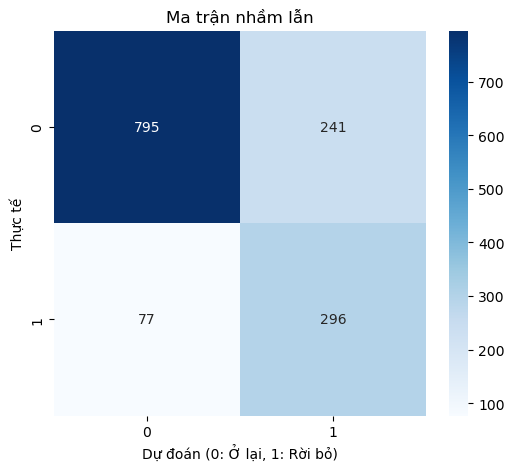

In [127]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. In báo cáo chi tiết
print(classification_report(y_test, y_pred))

# 2. Vẽ ma trận nhầm lẫn (Confusion Matrix)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Ma trận nhầm lẫn')
plt.xlabel('Dự đoán (0: Ở lại, 1: Rời bỏ)')
plt.ylabel('Thực tế')
plt.show()